# Autoregressive Models
Autoregressive model are similar to linear regression. In linear regression we have 2 independent variables $x$, $y$. In autoregressive model we use only 1 variable $y$ with its own shifted-in-time values (lag).

Asume we have $y_1, y_2, \dots, y_n$ which represents the values in time $1, 2, \dots, n$.

As mentioned, in autoregressive model, we use the same $y$ values with a delay or lag instead of time ($x$) values.  

Therefore, the line formula is shown as below:
\begin{equation*}
\large
y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}
\end{equation*}

The above formula shows the relation of time series data with its own lagged values with order 1 which is represented as $AR(1)$ (first-order autoregression).

\begin{equation*}
\large
AR(1) = y_{t}=\beta_{0}+\beta_{1}y_{t-1}+\epsilon_{t}
\end{equation*}

This model is a second-order autoregression, written as $AR(2)$, since the value at time $t$ is predicted from the values at times $t−1$ and $t−2$. More generally, a $kth-order$ autoregression, written as $AR(k)$, is a multiple linear regression in which the value of the series at any time $t$ is a (linear) function of the values at times $t−1,t−2,\dots ,t−k$.


# Loading Libraries and Initialize

In [1]:
%%capture
%run -i 1-ReadingData.ipynb

# Calculating Simple Linear Regression

In [16]:
df['close-10'] = df['close'].shift(-10)

x = df['close-10']
y = df['close']
cov = pd.DataFrame({'x': x, 'y': y}).cov()
print('Covariance Result')
print('------------------------------')
print(cov)
b1 = cov['x']['y'] / x.var()
b0 = y.mean() - b1 * x.mean()
print('------------------------------')
print('b0 (Intersection)',b0)
print('b1 (Slope)', b1)


Covariance Result
------------------------------
            x           y
x  926.223898  908.711408
y  908.711408  933.718740
------------------------------
b0 (Intersection) 1.7241335565643965
b1 (Slope) 0.9810925956109059


In [17]:
df

,open,high,low,close,volume,Name,close-10,arm
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,63.2571,63.785206
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,64.1385,64.649941
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,63.5099,64.033226
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,63.0571,63.588987
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,61.4957,62.057109
2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,60.0071,60.596655
2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,61.5919,62.151491
2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,60.8088,61.383197
2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,61.5117,62.072807


In [18]:
df['arm'] = b0 + b1 * x

# Visualizing All Data

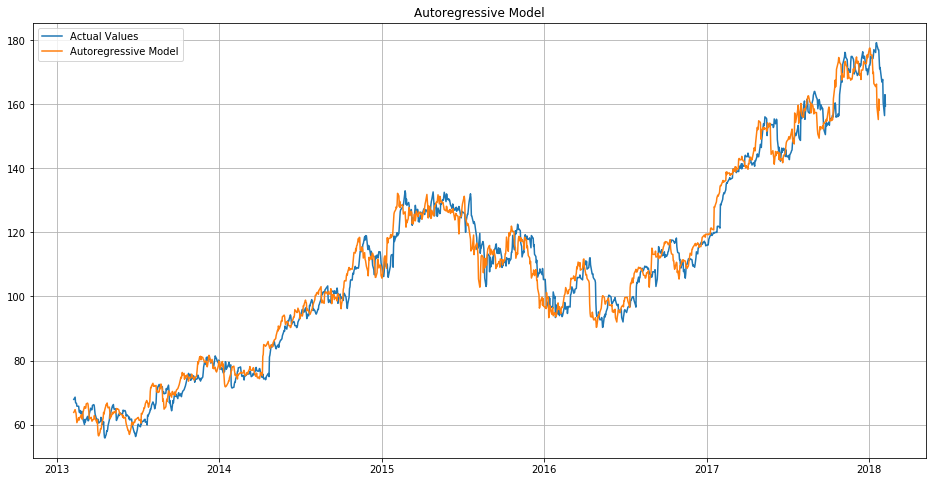

In [19]:
plt.figure(figsize=(16,8))
plt.title('Autoregressive Model')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['arm'], label='Autoregressive Model')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

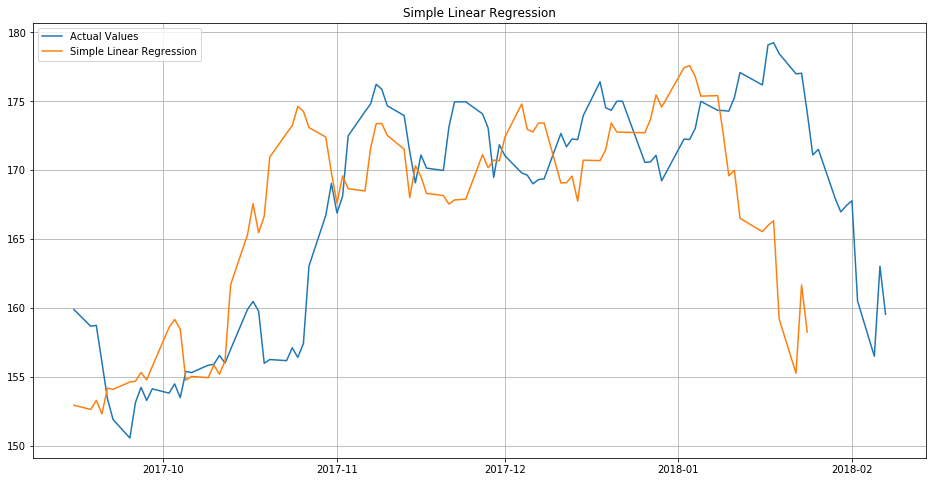

In [20]:
df1 = df[-100:]

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(df1['close'], label='Actual Values')
plt.plot(df1['arm'], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()